In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
file_dir = Path(r"C:\Users\user\Desktop\div\data\files")
cars_csv_path = file_dir / "car-sales-extended-missing-data.csv"
housing_csv_path = file_dir / "housing.csv"

In [19]:
df = pd.read_csv(housing_csv_path)
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


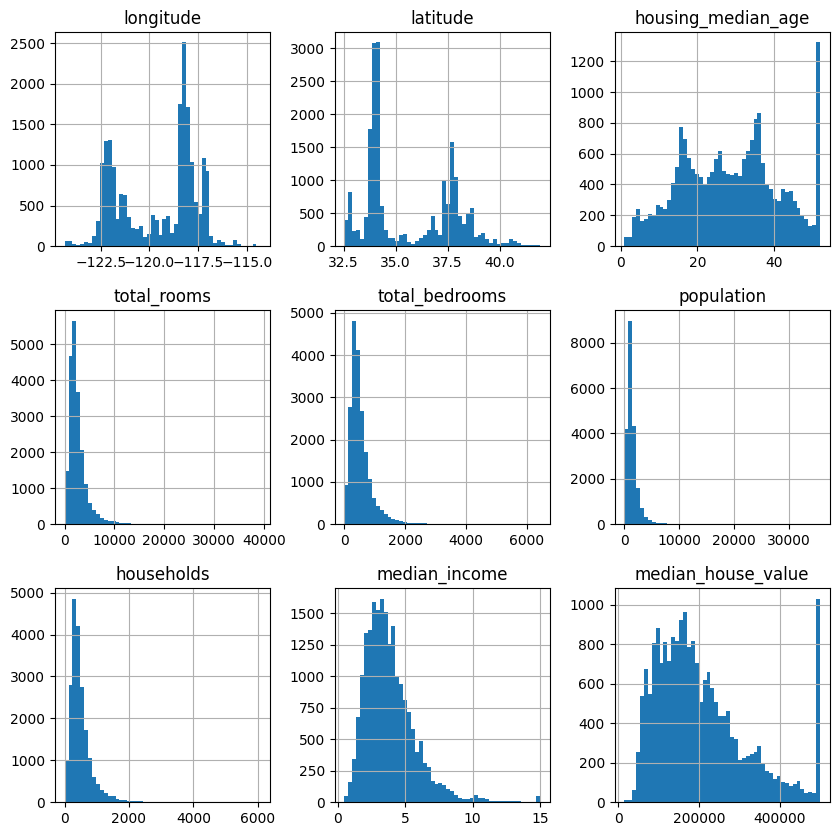

In [23]:
df.drop(columns=['ocean_proximity']).hist(figsize=(10, 10), bins=50)
plt.show()

In [32]:
arr = np.array([
    [1,2,3],
    [4,5,6]
])

arr[:, [0]] / arr[:, [1]]

array([[0.5],
       [0.8]])

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_cols = ['longitude',  'latitude', 'housing_median_age', ]
log_cols = ['total_rooms','total_bedrooms', 'population', 
            'households', 'median_income', 'median_house_value']
cat_cols = ['ocean_proximity']

log_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy = 'median')), 
    ("log", FunctionTransformer(func=np.log1p, inverse_func=np.expm1, feature_names_out='one-to-one')), 
    ("scl", StandardScaler()), 
])
ratio_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy = 'median')), 
    ("rat", FunctionTransformer(
        func=lambda arr: arr[:, [0]]/arr[:, [1]],
        feature_names_out=lambda *args, **kwargs: ['ratio'])
    ),
    ("scl", StandardScaler()), 
])
num_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy = 'median')), 
    ("scl", StandardScaler()), 
])
cat_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy = 'most_frequent')), 
    ("enc", OneHotEncoder()), 
])

preprocessing = ColumnTransformer([
    ("NUM", num_pipeline, num_cols), 
    ("CAT", cat_pipeline, cat_cols),
    ("LOG", log_pipeline, log_cols),
    ("RAT_tb/tr", ratio_pipeline, ['total_bedrooms', 'total_rooms']),
    ("RAT_p/tr", ratio_pipeline, ['population', 'total_rooms']),
    ("RAT_h/tr", ratio_pipeline, ['households', 'total_rooms']),
])

df_arr = preprocessing.fit_transform(df)
df_tr = pd.DataFrame(df_arr, columns=preprocessing.get_feature_names_out())
df_tr.tail()

,NUM__longitude,NUM__latitude,NUM__housing_median_age,CAT__ocean_proximity_<1H OCEAN,CAT__ocean_proximity_INLAND,CAT__ocean_proximity_ISLAND,CAT__ocean_proximity_NEAR BAY,CAT__ocean_proximity_NEAR OCEAN,LOG__total_rooms,LOG__total_bedrooms,LOG__population,LOG__households,LOG__median_income,LOG__median_house_value,RAT_tb/tr__ratio,RAT_p/tr__ratio,RAT_h/tr__ratio
20635,-0.758826,1.801647,-0.289187,0.0,1.0,0.0,0.0,0.0,-0.281605,-0.177042,-0.387090,-0.251243,-1.608366,-1.439305,0.165994,-0.038713,-0.024960
20636,-0.818722,1.806329,-0.845393,0.0,1.0,0.0,0.0,0.0,-1.441596,-1.435092,-1.559000,-1.705974,-0.691819,-1.461948,0.021671,-0.037589,-0.643217
20637,-0.823713,1.778237,-0.924851,0.0,1.0,0.0,0.0,0.0,0.122042,0.181548,-0.149112,0.121563,-1.460242,-1.145776,0.021134,-0.059697,-0.133748
20638,-0.873626,1.778237,-0.845393,0.0,1.0,0.0,0.0,0.0,-0.134015,-0.053635,-0.565257,-0.174439,-1.292722,-1.296760,0.093467,-0.076408,-0.213503
20639,-0.833696,1.750146,-1.004309,0.0,1.0,0.0,0.0,0.0,0.403995,0.511618,0.285399,0.399134,-0.826886,-1.201869,0.113275,-0.041989,-0.165834
